## POSTTEST 6

## Nama: Erman Parni Simanjuntak
## NIM: 2009106046

## Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dts
import seaborn as sns
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv("vgsales.csv")

df.head(5)

,Unnamed: 0.1,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,0,1.0,Wii Sports,Wii,2006.0,Sports,Wii Sports,41.49,29.02,3.77,11008.0,29.02
1,1,1,2.0,Super Mario Bros.,NES,1985.0,Platform,Super Mario Bros.,29.08,3.58,6.81,9329.0,3.58
2,2,2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Mario Kart Wii,15.85,12.88,3.79,5574.0,12.88
3,3,3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Wii Sports Resort,15.75,11.01,3.28,11010.0,11.01
4,4,4,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,7361.0,8.89


## K-mean Clustering

In [7]:
mdl = KMeans(n_clusters=3)

In [8]:
points = df[['NA_Sales', 'Other_Sales']]

In [9]:
mdl.fit(points)

KMeans(n_clusters=3)

In [10]:
ca = mdl.labels_

In [11]:
print(ca)

[1 1 2 ... 1 2 1]


## Visualisasi

In [12]:
X = points['NA_Sales']
Y = points['Other_Sales']

In [13]:
centroid = mdl.cluster_centers_

In [14]:
centroid

array([[2.53273026e-01, 1.90612445e+03],
       [2.64406568e-01, 9.59197983e+03],
       [2.76221257e-01, 5.78896813e+03]])

In [15]:
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

In [16]:
crt_X = pd.DataFrame(centroid_X)
crt_X.head()

,0
0,0.253273
1,0.264407
2,0.276221


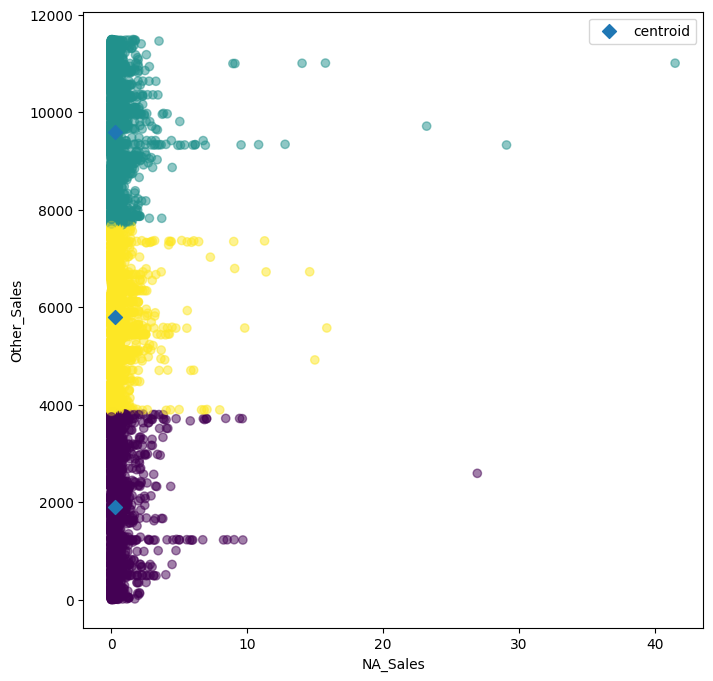

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(X, Y, alpha=0.5, c=ca)
plt.scatter(centroid_X, centroid_Y, marker='D', s=50, label='centroid')
plt.xlabel("NA_Sales")
plt.ylabel('Other_Sales')
plt.legend()
plt.show()

## Metode Elbow

In [20]:
cr = range(1,6)
inertias = []

for k in cr:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

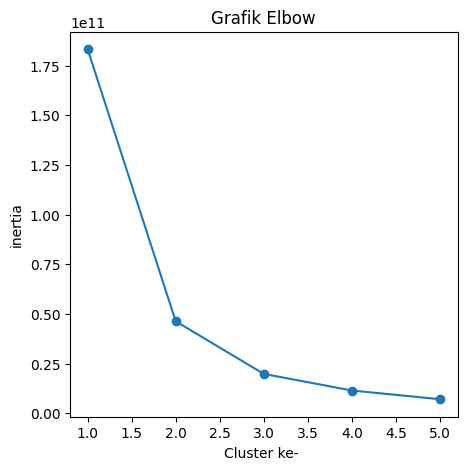

In [22]:
plt.figure(figsize=(5,5))
plt.plot(cr, inertias, '-o')
plt.title("Grafik Elbow")
plt.xlabel("Cluster ke- ")
plt.ylabel('inertia')
plt.show()